In [1]:
import numpy as np
import cv2
import pandas as pd

import pickle
from matplotlib import pyplot as plt
import os

from skimage.filters import roberts,sobel,scharr, prewitt
from scipy import ndimage as nd

In [2]:
# load an image
img=cv2.imread("train_images/SL_001.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

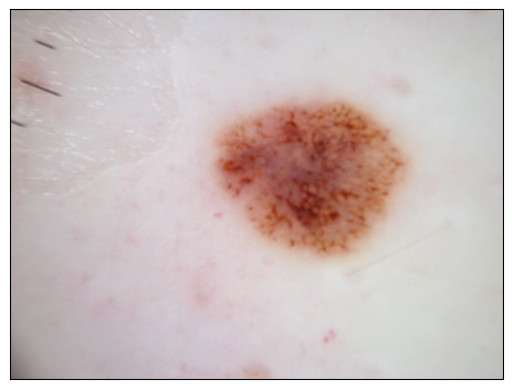

In [3]:
plt.imshow(img), plt.xticks([]), plt.yticks([])
plt.show()

In [4]:
# load mask
mask=cv2.imread("train_masks/SL_GT_001.png",0)
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

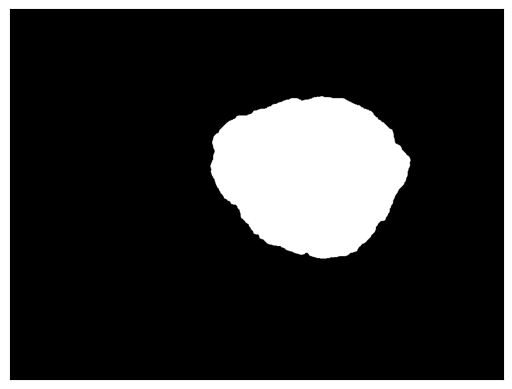

In [5]:
plt.imshow(mask,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

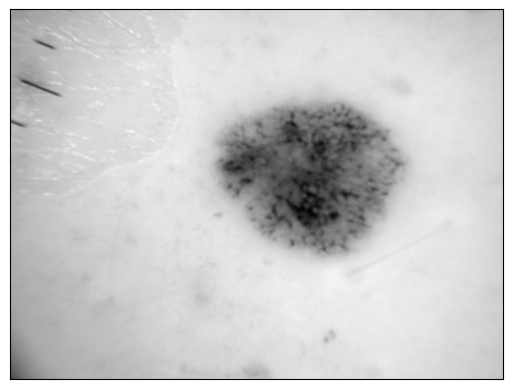

In [6]:
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

In [7]:
img_gray.shape

(768, 1024)

In [8]:
height,width = img_gray.shape

In [9]:
flat = img_gray.reshape(-1)
flat.shape

(786432,)

In [10]:
flat = flat.reshape(height,width)
flat.shape

(768, 1024)

In [11]:
flat = cv2.cvtColor(flat, cv2.COLOR_GRAY2BGR)
flat.shape

(768, 1024, 3)

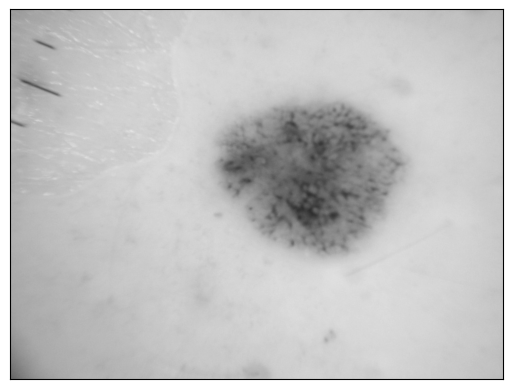

In [12]:
plt.imshow(flat,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

In [13]:
def loadImage(input_img):

    temp_df = pd.DataFrame(columns=["Pixel_Values"])

    pixel_values=input_img.reshape(-1)
    temp_df["Pixel_Values"] = pixel_values

    return temp_df

In [14]:
def channelValue(input_img):
    
    temp_df = pd.DataFrame(columns=["Blue", "Green","Red"])

    M = np.asarray(input_img)

    blue =M[:, :, 0].reshape(-1)
    temp_df["Blue"]=blue
    green =M[:, :, 1].reshape(-1)
    temp_df["Green"]=green
    red =M[:, :, 2].reshape(-1)
    temp_df["Red"]=red

    return temp_df

In [15]:
def gaborFeatures(img):
    
    gabor_df=pd.DataFrame(columns=['Gabor'])

    kernel = cv2.getGaborKernel((9,9),4/5. *np.pi,np.pi/4,0.1,0,ktype=cv2.CV_32F)
    edges=cv2.filter2D(img,cv2.CV_8UC3,kernel)
    edges=edges.reshape(-1)
    gabor_df['Gabor'] = edges
    return gabor_df

In [16]:
def cannyEdges(img):

    canny_df=pd.DataFrame(columns=['Canny'])
    edges=cv2.Canny(img,100,200)
    edges=edges.reshape(-1)
     
    canny_df['Canny'] = edges

    return canny_df

In [17]:
def robertsEdges(img):

    roberts_df=pd.DataFrame(columns=['Roberts'])
    edges=roberts(img)
    edges=edges.reshape(-1)
     
    roberts_df['Roberts'] = edges

    return roberts_df

In [18]:
def sobelEdges(img):

    sobel_df=pd.DataFrame(columns=['Sobel'])
    edges=sobel(img)
    edges=edges.reshape(-1)
     
    sobel_df['Sobel'] = edges

    return sobel_df

In [19]:
def scharrEdges(img):

    scharr_df=pd.DataFrame(columns=['Scharr'])
    edges=scharr(img)
    edges=edges.reshape(-1)
     
    scharr_df['Scharr'] = edges

    return scharr_df

In [20]:
def prewittEdges(img):

    prewitt_df=pd.DataFrame(columns=['Prewitt'])
    edges=prewitt(img)
    edges=edges.reshape(-1)
     
    prewitt_df['Prewitt'] = edges

    return prewitt_df

In [21]:
def gaussian3Edges(img):

    gaussian3_df=pd.DataFrame(columns=['Gaussian3'])
    edges=nd.gaussian_filter(img,sigma=3)
    edges=edges.reshape(-1)
     
    gaussian3_df['Gaussian3'] = edges

    return gaussian3_df

In [22]:
def gaussian7Edges(img):

    gaussian7_df=pd.DataFrame(columns=['Gaussian7'])
    edges=nd.gaussian_filter(img,sigma=7)
    edges=edges.reshape(-1)
     
    gaussian7_df['Gaussian7'] = edges

    return gaussian7_df

In [23]:
def loadMask(input_img):

    temp_df = pd.DataFrame(columns=["Mask_Values"])

    pixel_values=input_img.reshape(-1)
    temp_df["Mask_Values"] = pixel_values

    return temp_df

The function we want

In [24]:
import cv2
import numpy as np


input_dir = 'dataset/test'
output_dir = 'dataset/output'

# you are allowed to import other Python packages above
##########################
def segmentImage(img):
    # Inputs
    # img_gray: Input image, a 3D numpy array of row*col*3 in BGR format
    #
    # Output
    # outimg_gray: segmentation image
    #
    #########################################################################
    # ADD YOUR CODE BELOW THIS LINE
   
    
    """ 1.Import Model
        2.Create dataframe
        3. Get Channel Value
        4. Convert to Grayscale and get original shape
        5. Get Pixel Value
        6. Get Other Features
        7. Predict
        8. Reshape into 3d
    """

    image_dataset=pd.DataFrame(columns=["Pixel_Values"])

    img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    #Load data
    image_dataset = loadImage(img_gray)

    #Channel Value
    channel_df = channelValue(img)

    #Gabor Features
    gabor_df = gaborFeatures(img_gray)

    #Canny Edges
    canny_df = cannyEdges(img_gray)

    #Roberts Edges
    roberts_df = robertsEdges(img_gray)

    #Sobel Edges
    sobel_df = sobelEdges(img_gray)

    #Scharr Edges
    scharr_df = scharrEdges(img_gray)

    #Prewitt Edges
    prewitt_df = prewittEdges(img_gray)

    #Gaussian3 Edges
    gaussian3_df = gaussian3Edges(img_gray)

    #Gaussian7 Edges
    gaussian7_df = gaussian7Edges(img_gray)
    
    image_dataset=pd.concat([image_dataset, gabor_df,channel_df, canny_df,roberts_df,
                         sobel_df,scharr_df,prewitt_df,gaussian3_df,gaussian7_df], 
                         axis=1, join='outer')
    
    image_dataset["Roberts"] = (image_dataset["Roberts"] /image_dataset["Roberts"].abs().max()) * 100
    image_dataset["Sobel"] = (image_dataset["Sobel"] /image_dataset["Sobel"].abs().max()) * 100
    image_dataset["Scharr"] = (image_dataset["Scharr"] /image_dataset["Scharr"].abs().max()) * 100
    image_dataset["Prewitt"] = (image_dataset["Prewitt"] /image_dataset["Prewitt"].abs().max()) * 100

    image_dataset=image_dataset.astype("int")
    
    
    
    # END OF YOUR CODE
    #########################################################################
    #return outImg
    return image_dataset

In [25]:
import pickle
model = pickle.load(open("rf.sav", 'rb'))
#result = model.score(X_test, Y_test)
#print(result)

In [26]:
X = segmentImage(img)

In [27]:
X

,Pixel_Values,Gabor,Blue,Green,Red,Canny,Roberts,Sobel,Scharr,Prewitt,Gaussian3,Gaussian7
0,152,0,158,151,145,0,21,13,13,13,155,155
1,150,0,156,149,143,0,11,8,9,7,155,155
2,155,0,162,153,148,0,2,8,9,8,155,155
3,156,0,163,154,149,0,9,5,5,5,155,155
4,152,0,159,150,145,0,7,3,3,2,154,155
...,...,...,...,...,...,...,...,...,...,...,...,...
786427,188,0,188,189,184,0,0,2,2,2,187,188
786428,188,0,188,189,184,0,0,0,0,1,187,188
786429,188,0,188,189,184,0,0,1,1,1,187,188
786430,188,0,188,189,184,0,0,1,1,1,187,188


In [28]:
y_pred = model.predict(X)

In [29]:
np.unique(y_pred)

array([  0, 255])

In [30]:
mask=mask.reshape(-1)

In [31]:
mask.shape

(786432,)

In [32]:
np.unique(mask)

array([  0, 255], dtype=uint8)

In [33]:
from sklearn.metrics import precision_score,recall_score,jaccard_score
jaccard_score(mask,y_pred,pos_label=255)

0.0018980399637560208

In [34]:
y_pred=y_pred.reshape(height,width)
#y_pred = cv2.cvtColor(y_pred, cv2.COLOR_GRAY2BGR)

In [35]:
y_pred.shape

(768, 1024)

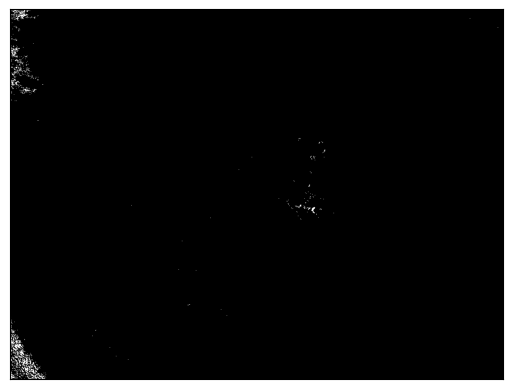

In [36]:
plt.imshow(y_pred,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()